The model created here is for ICU prediction for patients admitted under 0-2hrs 

In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 5.2 MB/s 


****Import Libraries****

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
pd.options.display.max_columns = None
pd.options.display.max_rows = None

**Import Dataset**

In [3]:
dataset = pd.read_excel("../input/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx", engine="openpyxl")

**Exploratory Data Analysis**

In [4]:
dataset.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [6]:
#total number of patients
print(f"The total number of patients from the dataset is {dataset['PATIENT_VISIT_IDENTIFIER'].max()+1}")

The total number of patients from the dataset is 385


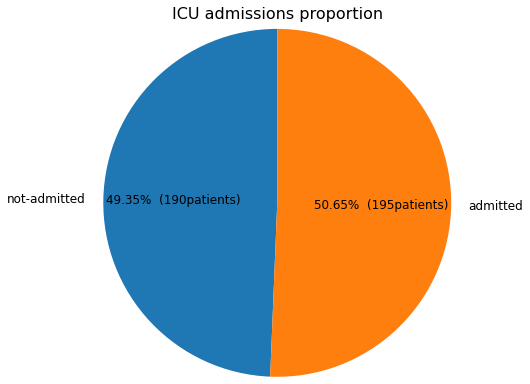

In [7]:
# proportion of patients admitted/ not admitted to ICU 
ICU_prop = dataset[dataset['WINDOW'] == 'ABOVE_12']
#group by ICU admission
ICU_prop_main = ICU_prop.groupby('ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["not-admitted", "admitted"]
plt.title('ICU admissions proportion', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

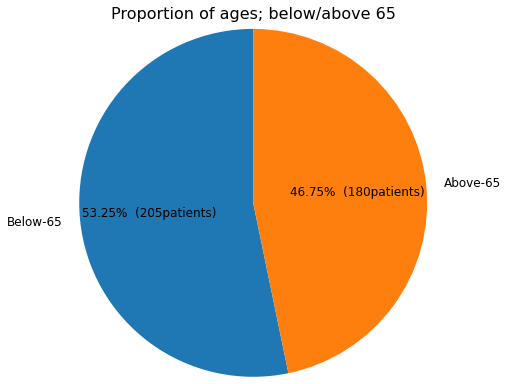

In [8]:
#proportion of patients below or above 65
prop_65 = ICU_prop.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Below-65", "Above-65"]
plt.title('Proportion of ages; below/above 65', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(prop_65['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(prop_65['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()
#print(f"The proportion of patients above or below 65 is: *{prop_65['PATIENT_VISIT_IDENTIFIER'][0]} patients below 65 and *{prop_65['PATIENT_VISIT_IDENTIFIER'][1]} above 65")

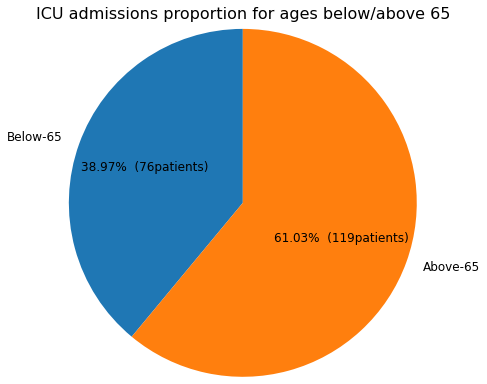

In [9]:
#Age distribution of patients (below or above 65) according to ICU admissions
AGE_65_ICU = ICU_prop[ICU_prop['ICU'] == 1]
AGE_65_ICU = AGE_65_ICU.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Below-65", "Above-65"]
plt.title('ICU admissions proportion for ages below/above 65', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()


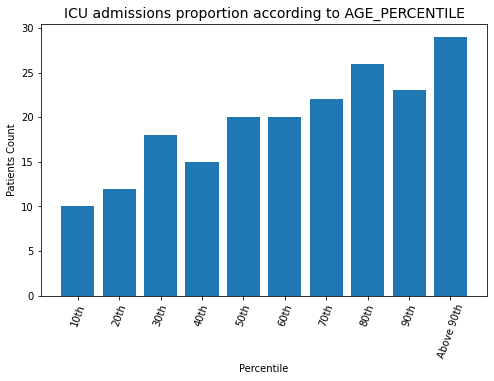

In [10]:
#Age distribution of patients(percentiles) according to ICU admissions
AGE_prop_percentil = ICU_prop[ICU_prop['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

**Data PreProcessing & Feature Engineering**

In [11]:
dataset.shape

(1925, 231)

In [12]:
# create new column to indicate if a patient eventually went to ICU (ICU_SUM)
df_admitted = (dataset.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum()>0).reset_index()*1
df_admitted.columns = ["PATIENT_VISIT_IDENTIFIER", "ICU_SUM"]

In [13]:
dataset_admitted = pd.merge(dataset, df_admitted, on = "PATIENT_VISIT_IDENTIFIER")

In [14]:
#check for missing data
dataset.isna().sum()

PATIENT_VISIT_IDENTIFIER               0
AGE_ABOVE65                            0
AGE_PERCENTIL                          0
GENDER                                 0
DISEASE GROUPING 1                     5
DISEASE GROUPING 2                     5
DISEASE GROUPING 3                     5
DISEASE GROUPING 4                     5
DISEASE GROUPING 5                     5
DISEASE GROUPING 6                     5
HTN                                    5
IMMUNOCOMPROMISED                      5
OTHER                                  5
ALBUMIN_MEDIAN                      1104
ALBUMIN_MEAN                        1104
ALBUMIN_MIN                         1104
ALBUMIN_MAX                         1104
ALBUMIN_DIFF                        1104
BE_ARTERIAL_MEDIAN                  1104
BE_ARTERIAL_MEAN                    1104
BE_ARTERIAL_MIN                     1104
BE_ARTERIAL_MAX                     1104
BE_ARTERIAL_DIFF                    1104
BE_VENOUS_MEDIAN                    1104
BE_VENOUS_MEAN  

In [15]:
# fill missing values
dataset_admitted.fillna(method='ffill', inplace = True)
dataset_admitted.fillna(method='bfill', inplace = True)

In [16]:
#drop rows with ICU == 1 ie drop data when the target variable is present, as stipulated by dataset author
dataset_ = dataset_admitted[dataset_admitted.ICU == 0].reset_index(drop= True)

In [17]:
#keeping only window 0-2 data
dataset_ = dataset_[dataset_.WINDOW == "0-2"].reset_index(drop = True)

In [18]:
#drop unnecessary columns
final_data = dataset_.drop(["PATIENT_VISIT_IDENTIFIER", "WINDOW", "ICU"],axis = 1)

In [19]:
#look for categorical columns and convert them
cat_columns = final_data.select_dtypes(object).columns 
#print()
final_data = pd.get_dummies(final_data, columns = cat_columns)

In [20]:
#drop duplicated columns
#columns were values are equal
final_data= final_data.reset_index().T.drop_duplicates().T.set_index('index')

In [21]:
final_data.head()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU_SUM,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.178122,0.212601,-0.141163,-0.380216,0.010915,0.841977,-0.185185,0.184615,-0.169811,-0.379310,0.000000,0.842105,-0.587629,-0.325,-0.572650,-1.000000,0.010989,0.797980,0.555556,0.556757,0.298507,0.757576,0.710145,1.000000,0.513043,0.472393,0.114504,0.764706,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.463415,-0.938950,-1.0,0.367347,-0.906582,-0.742004,-0.958528,-0.891993,0.018868,0.000000,-0.959849,-0.948553,-0.628814,-0.730290,-0.723890,-0.170732,-0.479290,-0.77931,-0.852761,-0.586767,0.234043,0.424242,-0.228304,-0.592593,0.939394,0.777778,-0.142857,-0.995428,-0.986662,-0.846633,-0.927711,-0.978029,-0.181070,-0.551603,-0.280660,-0.543785,0.057292,0.797149,-0.160494,-0.538462,-0.273585,-0.517241,0.107143,0.789474,-0.298969,-0.450,-0.487179,-0.642857,0.142857,0.878788

In [22]:
final_data.shape

(353, 95)

In [23]:
#check for empty  or null cells
np.where(pd.isnull(final_data))

(array([], dtype=int64), array([], dtype=int64))

**Feature Selection**

In [24]:
#we reduce dataset  variables by checking correlations  with target column
corr_data = final_data.corrwith(final_data["ICU_SUM"])
print(corr_data)


AGE_ABOVE65                         0.292719
GENDER                             -0.115633
DISEASE GROUPING 1                  0.072626
DISEASE GROUPING 2                  0.088044
DISEASE GROUPING 3                  0.123178
DISEASE GROUPING 4                  0.112807
DISEASE GROUPING 5                  0.123032
DISEASE GROUPING 6                 -0.026096
HTN                                 0.181559
IMMUNOCOMPROMISED                   0.072270
OTHER                               0.049401
ALBUMIN_MEDIAN                     -0.062210
ALBUMIN_DIFF                             NaN
BE_ARTERIAL_MEDIAN                  0.115663
BE_VENOUS_MEDIAN                    0.053215
BIC_ARTERIAL_MEDIAN                 0.020239
BIC_VENOUS_MEDIAN                  -0.053354
BILLIRUBIN_MEDIAN                  -0.004312
BLAST_MEDIAN                        0.079402
CALCIUM_MEDIAN                     -0.130913
CREATININ_MEDIAN                    0.113333
FFA_MEDIAN                          0.086282
GGT_MEDIAN

In [25]:
corr_data.describe()

count    94.000000
mean      0.026424
std       0.132713
min      -0.193364
25%      -0.041248
50%       0.021372
75%       0.074761
max       1.000000
dtype: float64

In [26]:
#select columns from correlation data with conditions
np_corr_data = np.array(corr_data)
columns = []
for i in np_corr_data:
  if(i):
    if(i>0.04):
      columns.append(True)
    elif(i<-0.02):
      columns.append(True)
    else:
      columns.append(False)
  else:
    columns.append(False)

print(len(columns), columns.count(True))
selection = np.array(columns)
#print(selection)
selected_final_data = final_data.loc[:, selection]
selected_final_data.head()

95 70


,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_VENOUS_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_VENOUS_MEDIAN,PCR_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU_SUM,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.704142,-0.875236,0.363636,-0.540721,-0.518519,0.345679,-0.028571,-0.997201,-0.990854,-0.836145,-0.994912,0.086420,-0.593220,-0.285714,0.736842,0.086420,-0.586207,-0.285714,0.736842,0.237113,0.000,0.898990,-0.247863,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.704142,-0.939887,0.363636,-0.399199,-0.703704,0.345679,0.085714,-0.995428,-0.986662,-0.836145,-0.978029,-0.178122,-0.380216,0.010915,0.841977,-0.185185,-0.379310,0.000000,0.842105,-0.587629,-0.325,0.797980,0.555556,0.298507,0.757576,0.710145,1.000000,0.513043,0.472393,0.114504,-0.797980,0.200359,-0.239515,-0.802317,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-1.0,-0.463415,-1.0,0.367347,-0.906582,-0.742004,-0.958528,-0.891993,0.018868,0.000000,-0.959849,-0.948553,-0.628814,-0.730290,-0.723890,-0.479290,-0.586767,0.424242,-0.228304,-0.592593,0.777778,-0.142857,-0.995428,-0.986662,-0.927711,-0.978029,-0.181070,-0.543785,0.057292,0.797149,-0.160494,-0.517241,0.107143,0.789474,-0.298969,-0.450,0.878788,-0.247863,-0.149254,-0.454545,0.101449,0.947368,-0.547826,-0.435583,-0.419847,-0.898990,-0.343258,-0.576744,-0.900129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.704142,-0.990926,0.363636,-0.457944,-0.592593,0.345679,0.142857,-0.998507,-0.991235,-0.903614,-1.000000,-0.002798,-0.535593,0.033571,0.694035,0.086420,-0.517241,-0.035714,0.736842,-0.381443,-0.625,0.171717,0.145299,0.477612,-0.272727,0.623188,1.000000,-0.078261,-0.190184,0.251908,-0.171717,-0.057718,-0.069094,-0.172436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,0.243902,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.704142,-0.997732,0.363636,-0.292390,-0.666667,0.345679,0.085714,-0.997947,-0.988948,-0.884337,-1.000000,0.290762,-0.499708,0.040640,0.820327,0.333333,-0.517241,0.071429,0.789474,0.030928,-0.125,0.898990,0.094017,0.10447

**MODEL AND EVALUATION**

In [27]:
#create x and y data
X_data = selected_final_data.drop(['ICU_SUM'], axis = 1)
Y_data = selected_final_data[['ICU_SUM']]

In [28]:
print(X_data.shape)
print(Y_data.shape)

(353, 69)
(353, 1)


In [29]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=1)

In [30]:
#fit model
model =tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=10)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [31]:
#model prediction 
y_pred = model.predict(X_test)

In [32]:
#accuracy, precision and recall
print("Accuracy:{:.6f}".format(metrics.accuracy_score(Y_test, y_pred)))
print("Precision:{:.6f}".format(metrics.precision_score(Y_test, y_pred)))
print("Recall:{:.6f}".format(metrics.recall_score(Y_test, y_pred)))

Accuracy:0.650943
Precision:0.631579
Recall:0.510638
